In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('drugs_side_effects_drugs_com.csv')
df.head(1000)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Freeze It,Colds & Flu,hives ; difficult breathing; swelling of your ...,camphor and menthol topical,Topical rubefacient,"Anti-Itch Steroid Free, Arctic Relief, Avedana...",0%,OTC,N,N,NaN,Buprenex: https://www.drugs.com/buprenex.html ...,Cold Symptoms Other names: Cold; Common Cold; ...,NaN,NaN,https://www.drugs.com/mtm/freeze-it.html,https://www.drugs.com/condition/cold-symptoms....
996,GNP Cold Relief Plus,Colds & Flu,"WARNING/CAUTION: Even though it may be rare, s...","Acetaminophen, Chlorpheniramine, and Phenyleph...",Upper respiratory combinations,NaN,0%,Rx/OTC,N,N,X,Benadryl: https://www.drugs.com/benadryl.html ...,Cold Symptoms Other names: Cold; Common Cold; ...,NaN,NaN,https://www.drugs.com/cdi/gnp-cold-relief-plus...,https://www.drugs.com/condition/cold-symptoms....
997,Guaifen DAC,Colds & Flu,hives ; difficult breathing; swelling of your ...,"codeine, guaifenesin, and pseudoephedrine",Upper respiratory combinations,"Ambifed CD, Biotussin DAC, Cheratussin DAC, Lo...",0%,Rx/OTC,C,M,X,Benadryl: https://www.drugs.com/benadryl.html ...,Cold Symptoms Other names: Cold; Common Cold; ...,NaN,NaN,https://www.drugs.com/mtm/guaifen-dac.html,https://www.drugs.com/condition/cold-symptoms....
998,Histafed,Colds & Flu,hives ; difficult breathing; swelling of your ...,pseudoephedrine and triprolidine,Upper respiratory combinations,"Aphedrid, A-Phedrin, Aprodine, Vi-Sudo",0%,Rx/OTC,C,N,X,NaN,Cold Symptoms Other names: Cold; Common Cold; ...,NaN,NaN,https://www.drugs.com/mtm/histafed.html,https://www.drugs.com/condition/cold-symptoms....


In [20]:
# Drop collums that not needed much for now
columns_to_drop = ['alcohol', 'related_drugs', 'brand_names', 'drug_link', 'medical_condition_url', 'medical_condition_description']
df_cleaned = df.drop(columns=columns_to_drop)

# Drop rows with missing target (side_effects)
df_cleaned = df_cleaned.dropna(subset=['side_effects'])

# Feeling values that are empty
for col in ['generic_name', 'drug_classes', 'pregnancy_category', 'rx_otc']:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# Fill numerical missing values with median
df_cleaned['rating'] = df_cleaned['rating'].fillna(df_cleaned['rating'].median())
df_cleaned['no_of_reviews'] = df_cleaned['no_of_reviews'].fillna(df_cleaned['no_of_reviews'].median())


In [21]:
df_cleaned.head(1)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,rating,no_of_reviews
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",87%,Rx,D,N,6.8,760.0


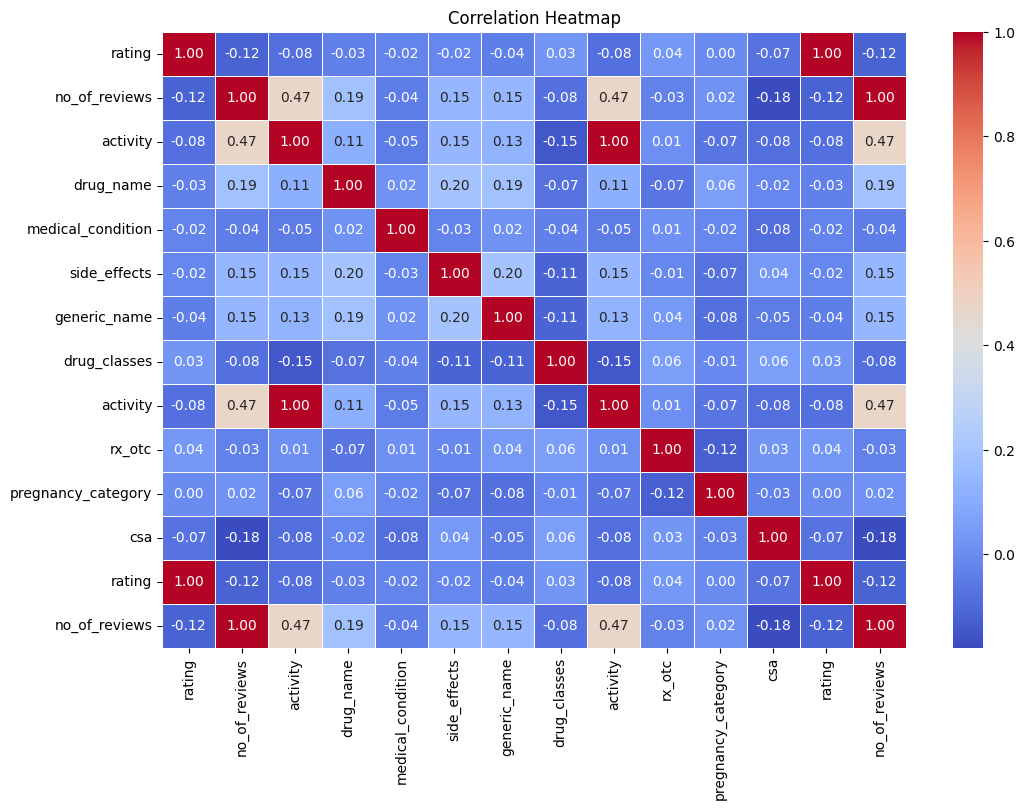

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for visualization
df_viz = df_cleaned.copy()

# Encode categorical columns
cat_cols = ['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'drug_classes', 'activity', 'rx_otc', 'pregnancy_category', 'csa','rating', 'no_of_reviews']
df_viz[cat_cols] = df_viz[cat_cols].astype('category').apply(lambda x: x.cat.codes)

# Clean and convert activity column
df_viz['activity'] = df_cleaned['activity'].str.replace('%', '').astype(float)

# Select numeric columns
numeric_df = df_viz[['rating', 'no_of_reviews', 'activity'] + cat_cols]

# Compute and plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


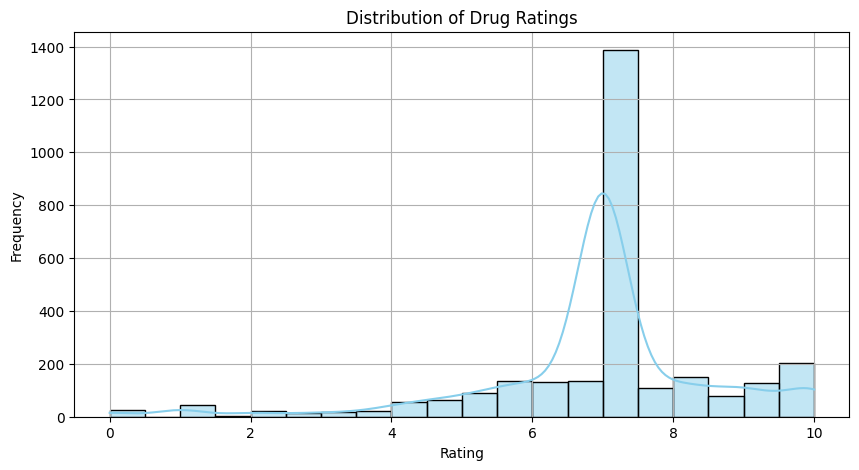

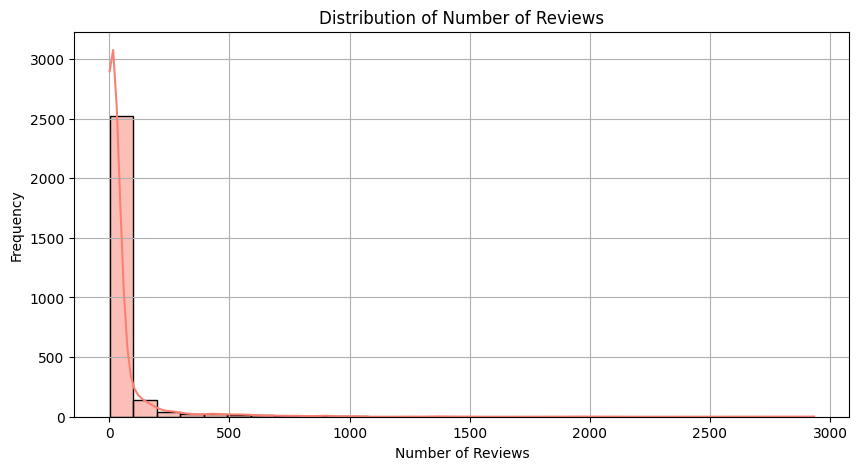

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ratings distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Number of reviews distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['no_of_reviews'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_4984\4248890326.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(labels), x=list(values), palette="viridis")


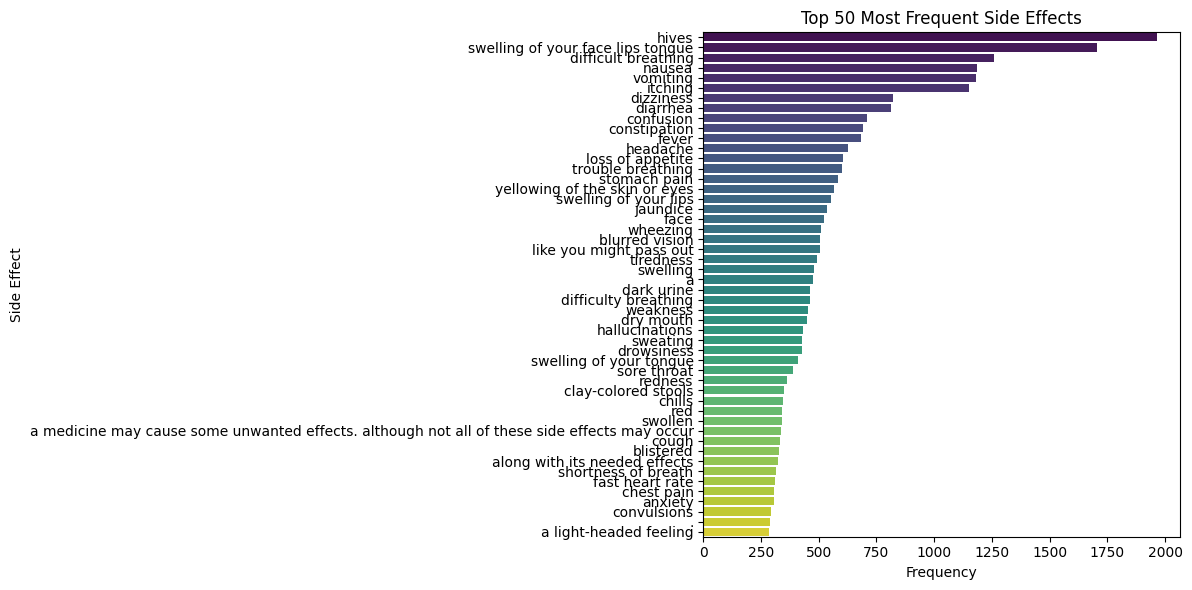

In [24]:
from collections import Counter
import re

# Flatten side effects list
side_effects_flat = []
for s in df_cleaned['side_effects']:
    s_clean = re.sub(r"[;()]", ",", s)
    s_list = [x.strip().lower() for x in s_clean.split(',') if x.strip()]
    side_effects_flat.extend(s_list)

# Only working on top 50 side effects for memory issue
side_effect_counts = Counter(side_effects_flat)
top_50_effects = side_effect_counts.most_common(50)

labels, values = zip(*top_50_effects)
plt.figure(figsize=(12, 6))
sns.barplot(y=list(labels), x=list(values), palette="viridis")
plt.title("Top 50 Most Frequent Side Effects")
plt.xlabel("Frequency")
plt.ylabel("Side Effect")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import re

# Cleaning and splitting 
def clean_side_effects(text):
    text = re.sub(r"[;()]", ",", text)
    return [s.strip().lower() for s in text.split(',') if s.strip()]

df_cleaned['side_effect_list'] = df_cleaned['side_effects'].apply(clean_side_effects)

side_effects_flat = [e for lst in df_cleaned['side_effect_list'] for e in lst]
top_50_effects = [e for e, _ in Counter(side_effects_flat).most_common(50)]

df_cleaned['side_effect_list'] = df_cleaned['side_effect_list'].apply(lambda lst: [e for e in lst if e in top_50_effects])

mlb_top50 = MultiLabelBinarizer(classes=top_50_effects)
side_effects_df = pd.DataFrame(mlb_top50.fit_transform(df_cleaned['side_effect_list']), columns=mlb_top50.classes_)


In [26]:
df_cleaned.head(1)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,rating,no_of_reviews,side_effect_list
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",87%,Rx,D,N,6.8,760.0,"[hives, difficult breathing, fever, sore throa..."


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Define features and labels

X_raw = df_cleaned[['drug_name', 'medical_condition', 'generic_name', 'drug_classes',
                    'rx_otc', 'pregnancy_category', 'csa', 'rating', 'no_of_reviews']]
y = side_effects_df

categorical_cols = ['drug_name', 'medical_condition', 'generic_name', 'drug_classes',
                    'rx_otc', 'pregnancy_category', 'csa']
numerical_cols = ['rating', 'no_of_reviews']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)


In [28]:
X_train.data

array([ 1.,  1.,  1., ...,  1.,  7., 13.])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

multi_rf = MultiOutputClassifier(rf)

multi_rf.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42))

In [30]:
y_pred_rf = multi_rf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

# Show report on first 10 side effects for readability
print(classification_report(y_test.iloc[:, :10], y_pred_rf[:, :10], target_names=y.columns[:10], zero_division=0))


                                   precision    recall  f1-score   support

                            hives       0.84      0.98      0.90       381
swelling of your face lips tongue       0.78      0.99      0.87       335
              difficult breathing       0.87      0.72      0.78       253
                           nausea       0.88      0.60      0.71       186
                         vomiting       0.89      0.63      0.74       168
                          itching       0.96      0.65      0.77       197
                        dizziness       0.87      0.54      0.67       131
                         diarrhea       0.91      0.57      0.70       141
                        confusion       0.93      0.57      0.70       111
                     constipation       0.90      0.70      0.79       117

                        micro avg       0.85      0.76      0.80      2020
                        macro avg       0.88      0.69      0.76      2020
                     we

In [32]:
import joblib

joblib.dump(multi_rf, "side_effect_rf_model.pkl")
joblib.dump(preprocessor, "preprocessor_rf.pkl")
joblib.dump(mlb_top50, "mlb_top50.pkl")


['mlb_top50.pkl']